In [2]:
import pandas as pd
import numpy as np

In [3]:
dataset = pd.read_csv(r'C:\Users\sreep\Desktop\projects and hackathons\INTEL_20\data_loc_time.csv')

In [4]:
#Label encoding alarm type

dataset['alarmType']=dataset['alarmType'].astype('category')
dataset['alarmType_cat']=dataset['alarmType'].cat.codes

In [5]:
dataset.dtypes


recorded_at_time       int64
latitude             float64
longitude            float64
alarmType           category
alarmType_cat           int8
dtype: object

In [6]:
dataset.head(5)
'''
for i in range(len(dataset['alarmType'])):
    if dataset['alarmType'][i]=='stoppage':
        print(dataset['alarmType_cat'][i])'''



"\nfor i in range(len(dataset['alarmType'])):\n    if dataset['alarmType'][i]=='stoppage':\n        print(dataset['alarmType_cat'][i])"

In [7]:
#Features ClassLabels

#X = dataset.iloc[:,:-2].values
#Y = dataset.iloc[:,:4].values


X = dataset.drop(['alarmType_cat','alarmType'],axis=1)
Y = dataset['alarmType_cat']


In [8]:
#Train test split

from sklearn.model_selection import train_test_split as tts
X_train, X_test, Y_train, Y_test = tts(X,Y, test_size = 0.10, shuffle=True)

print("Training length:" + repr(len(X_train)))
print("Testing length:" + repr(len(X_test)))
print("Training length:" + repr(len(Y_train)))
print("Testing length:" + repr(len(Y_test)))

Training length:106504
Testing length:11834
Training length:106504
Testing length:11834


In [9]:
#Feature scaling

from sklearn.preprocessing import RobustScaler as RS
scaler = RS()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [44]:
#Training 

from sklearn.neighbors import KNeighborsClassifier as KNC


classifier = KNC(n_neighbors = 21 )
classifier.fit(X_train,Y_train)




KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=21, p=2,
                     weights='uniform')

In [45]:
import pickle 

In [46]:
#Saving 

filename='model_loc_time_knn.pkl'

pickle.dump(classifier, open(filename, 'wb'))



In [47]:
#loading the model

filename='model_loc_time_knn.pkl'
model=pickle.load(open(filename, 'rb'))

In [48]:
#Predictions

Y_pred = model.predict(X_test)

In [49]:
def res(time,lat,long):
    r=model.predict([[time,lat,long]])
    if r==0:
        print("FCW")
    elif r==1:
        print("HB")
    elif r==2:
        print("HMW")
    elif r==3:
        print("PCW")
    elif r==4:
        print("Stoppage")


res(10,8.180509567,77.418396)

HMW


In [50]:
#Evaluation

from sklearn.metrics import classification_report as cr, confusion_matrix as cm, accuracy_score as acc_s

print("Confusion Matrix : \n", cm(Y_test,Y_pred))
print("\n\nClassification report : \n", cr(Y_test,Y_pred))
print("\n\nAccuracy : ", acc_s(Y_test,Y_pred)*100)


Confusion Matrix : 
 [[2498    0 2544   61   24]
 [  49    1   43    0    3]
 [1701    0 4093   24   15]
 [ 345    0  138  104   16]
 [  31    0   27   10  107]]


Classification report : 
               precision    recall  f1-score   support

           0       0.54      0.49      0.51      5127
           1       1.00      0.01      0.02        96
           2       0.60      0.70      0.65      5833
           3       0.52      0.17      0.26       603
           4       0.65      0.61      0.63       175

    accuracy                           0.57     11834
   macro avg       0.66      0.40      0.41     11834
weighted avg       0.57      0.57      0.56     11834



Accuracy :  57.486902146357956


In [51]:
res(3,8.178689957,77.42429352)

HMW


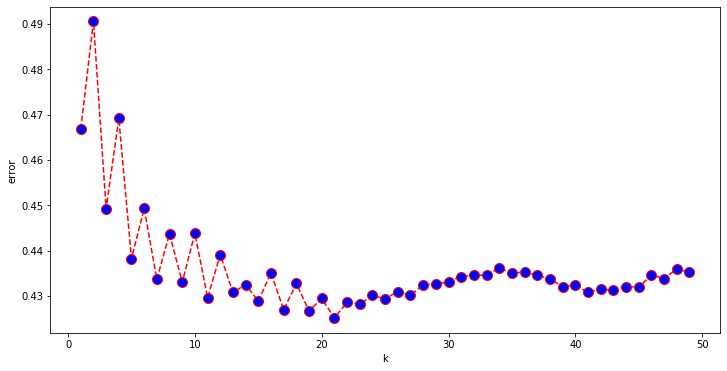

In [18]:
#Finding suitable k

e=[]

for i in range(1,50):
    knn=KNC(n_neighbors=i)
    knn.fit(X_train,Y_train)
    pred_i=knn.predict(X_test)
    e.append(np.mean(pred_i !=Y_test))
       
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(range(1,50), e,color='red',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.xlabel('k')
plt.ylabel('error')

plt.show()

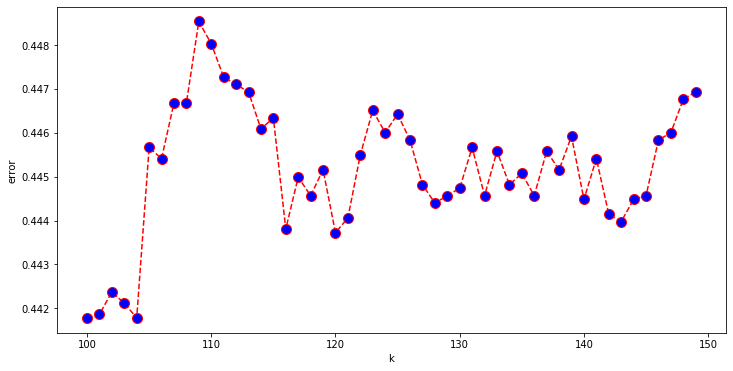

In [19]:
#Finding suitable k

e=[]

for i in range(100,150):
    knn=KNC(n_neighbors=i)
    knn.fit(X_train,Y_train)
    pred_i=knn.predict(X_test)
    e.append(np.mean(pred_i !=Y_test))
    
err=np.array(e)
    
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(range(100,150), e,color='red',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.xlabel('k')
plt.ylabel('error')

plt.show()

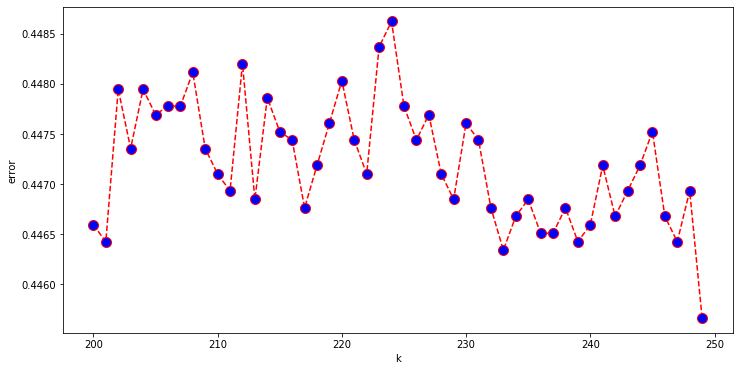

In [60]:
#Finding suitable k

e=[]

for i in range(200,250):
    knn=KNC(n_neighbors=i)
    knn.fit(X_train,Y_train)
    pred_i=knn.predict(X_test)
    e.append(np.mean(pred_i !=Y_test))
    
err=np.array(e)
    
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(range(200,250), e,color='red',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.xlabel('k')
plt.ylabel('error')

plt.show()

In [58]:

print(set(Y_pred))

print(set(Y_test))
print(set(Y_train))


{0, 1, 2, 3, 4}
{0, 1, 2, 3, 4}
{0, 1, 2, 3, 4}


In [52]:
def CountFrequency(my_list): 
  
    # Creating an empty dictionary  
    freq = {} 
    for item in my_list: 
        if (item in freq): 
            freq[item] += 1
        else: 
            freq[item] = 1
  
    for key, value in freq.items(): 
        print (key," : ", value) 
  

  


In [53]:
CountFrequency(dataset['alarmType_cat']) 

0  :  51481
3  :  6009
1  :  936
2  :  58064
4  :  1848


In [54]:
CountFrequency(dataset['alarmType']) 

FCW  :  51481
PCW  :  6009
HB  :  936
HMW  :  58064
stoppage  :  1848


In [55]:
CountFrequency(Y_pred) 

2  :  6845
0  :  4624
3  :  199
4  :  165
1  :  1


In [56]:
CountFrequency(Y_test) 

2  :  5833
0  :  5127
3  :  603
4  :  175
1  :  96


In [57]:
CountFrequency(Y_train) 

0  :  46354
2  :  52231
4  :  1673
3  :  5406
1  :  840
